<a href="https://colab.research.google.com/github/moshemi/DSCourse/blob/main/PCA_For_Separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D

# Set Seaborn style
sns.set(style="whitegrid")

In [2]:
### Generate Two Groups of 2D Data ###
N = 100  # Number of points per group
mean1, mean2 = [-2, -2], [2, 2]  # Means for the two groups
cov = [[1, 0.5], [0.5, 1]]  # Shared covariance matrix

group1 = np.random.multivariate_normal(mean1, cov, N)
group2 = np.random.multivariate_normal(mean2, cov, N)

# Combine the two groups
data = np.vstack((group1, group2))
labels = np.hstack((np.zeros(N), np.ones(N)))  # 0 for group1, 1 for group2


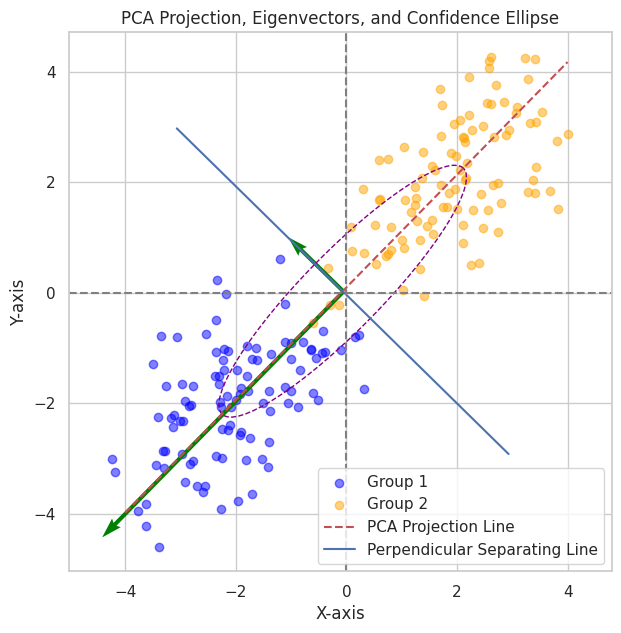

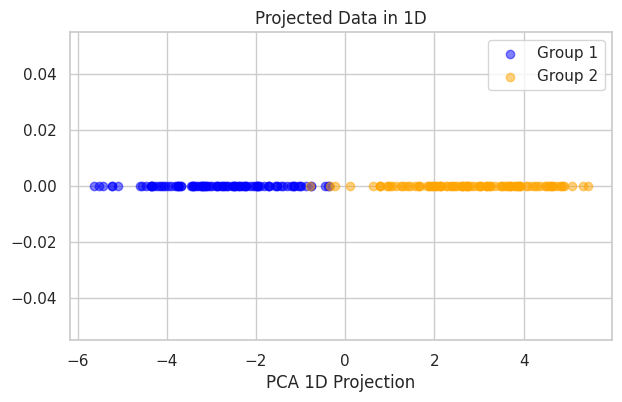

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# Set Seaborn style
sns.set(style="whitegrid")

### Apply PCA to Find Separation Line ###
pca = PCA(n_components=1)
projected_data = pca.fit_transform(data)  # Project to 1D
principal_axis = pca.components_[0]  # Principal axis
mean_projection = np.mean(data, axis=0)  # Center of the data
cov_matrix = np.cov(data.T)  # Covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Define the PCA projection line in original space
x_vals = np.linspace(-4, 4, 100)
y_vals = (principal_axis[1] / principal_axis[0]) * (x_vals - mean_projection[0]) + mean_projection[1]

# Define the separating line (perpendicular to PCA projection line)
perpendicular_slope = -1 / (principal_axis[1] / principal_axis[0])
x_sep_vals = np.linspace(mean_projection[0] - 3, mean_projection[0] + 3, 100)
y_sep_vals = perpendicular_slope * (x_sep_vals - mean_projection[0]) + mean_projection[1]

### Plot Original 2D Data, PCA Projection Line, Eigenvectors, and Confidence Ellipse ###
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(group1[:, 0], group1[:, 1], alpha=0.5, label='Group 1', color='blue')
ax.scatter(group2[:, 0], group2[:, 1], alpha=0.5, label='Group 2', color='orange')
ax.plot(x_vals, y_vals, 'r--', label='PCA Projection Line')
ax.plot(x_sep_vals, y_sep_vals, 'b-', label='Perpendicular Separating Line')
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('PCA Projection, Eigenvectors, and Confidence Ellipse')
ax.legend()
ax.axis("equal")

# Plot Eigenvectors (Principal Directions)
for i in range(2):
    vec = eigenvectors[:, i] * np.sqrt(eigenvalues[i]) * 2  # Scale with variance
    ax.quiver(mean_projection[0], mean_projection[1], vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='green', label=f'Eigenvector {i+1}')

# Plot Confidence Ellipse
width, height = 2 * np.sqrt(eigenvalues)
angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
ellipse = Ellipse(mean_projection, width, height, angle=np.degrees(angle), edgecolor='purple', facecolor='none', linestyle='--', label='Confidence Ellipse')
ax.add_patch(ellipse)

plt.show()

### Plot 1D Projection ###
plt.figure(figsize=(7,4))
plt.scatter(projected_data[:N], np.zeros(N), label='Group 1', alpha=0.5, color='blue')
plt.scatter(projected_data[N:], np.zeros(N), label='Group 2', alpha=0.5, color='orange')
plt.xlabel('PCA 1D Projection')
plt.title('Projected Data in 1D')
plt.legend()
plt.show()


In [ ]:

### Apply PCA to Find Separation Line ###
pca = PCA(n_components=1)
projected_data = pca.fit_transform(data)  # Project to 1D
principal_axis = pca.components_[0]  # Principal axis
mean_projection = np.mean(data, axis=0)  # Center of the data
cov_matrix = np.cov(data.T)  # Covariance matrix

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Define the PCA projection line in original space
x_vals = np.linspace(-4, 4, 100)
y_vals = (principal_axis[1] / principal_axis[0]) * (x_vals - mean_projection[0]) + mean_projection[1]

# Define the separating line (perpendicular to PCA projection line)
perpendicular_slope = -1 / (principal_axis[1] / principal_axis[0])
x_sep_vals = np.linspace(mean_projection[0] - 3, mean_projection[0] + 3, 100)
y_sep_vals = perpendicular_slope * (x_sep_vals - mean_projection[0]) + mean_projection[1]

### 3D PCA Example with Plotly Interactive Visualization ###
N = 100  # Number of points per group
mean1_3D, mean2_3D = [-2, -2, -2], [2, 2, 2]  # 3D means
cov_3D = [[1, 0.5, 0.3], [0.5, 1, 0.2], [0.3, 0.2, 1]]  # 3D covariance matrix

group1_3D = np.random.multivariate_normal(mean1_3D, cov_3D, N)
group2_3D = np.random.multivariate_normal(mean2_3D, cov_3D, N)

data_3D = np.vstack((group1_3D, group2_3D))
pca_3D = PCA(n_components=2)
projected_data_3D = pca_3D.fit_transform(data_3D)
principal_axes_3D = pca_3D.components_
mean_projection_3D = np.mean(data_3D, axis=0)

# Create a grid for the separating plane
xx, yy = np.meshgrid(np.linspace(-4, 4, 10), np.linspace(-4, 4, 10))
z_vals = (-principal_axes_3D[0, 0] * xx - principal_axes_3D[0, 1] * yy) / principal_axes_3D[0, 2] + mean_projection_3D[2]

# Create Interactive 3D Plot Using Plotly
fig = go.Figure()

# Add scatter points for both groups
fig.add_trace(go.Scatter3d(x=group1_3D[:, 0], y=group1_3D[:, 1], z=group1_3D[:, 2],
                           mode='markers', marker=dict(size=5, color='blue', opacity=0.7), name='Group 1'))
fig.add_trace(go.Scatter3d(x=group2_3D[:, 0], y=group2_3D[:, 1], z=group2_3D[:, 2],
                           mode='markers', marker=dict(size=5, color='orange', opacity=0.7), name='Group 2'))

# Add separating plane
fig.add_trace(go.Surface(z=z_vals, x=xx, y=yy, colorscale='Reds', opacity=0.5, name='Separating Plane'))

# Configure Layout
fig.update_layout(
    title='3D PCA Projection with Separating Plane (Interactive)',
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Z-axis',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show interactive plot
fig.show()
